# ROAD COST ANALYSIS 

## PART III- DATA ANALYSIS

### Introduction
In this part of the project, we will analyze the previously prepared data on road construction costs in Poland.

The original data contains the following columns:

* 'Elementy_rozliczeniowe': Billing elements
* 'Jednostka': Measure unite
* 'Ilosc': Quantity
* 'Cena_jedn': Unit price
* 'Wartosc_calkowita': Total value
* 'Droga': Road number
* 'Rok': Year
* 'Dlugosc_drogi': Road length
* 'Kategoria_robot': Road number
* 'Kategoria_drogi': Category of construction works
* 'Cena_jedn_per_km': Unit price per km
* 'Wartosc_calkowita_per_km': Total value per km

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functions.data_tools import get_element

%matplotlib inline

In [2]:
road_data = pd.read_excel('..\Projekt_Analiza_Danych\DATA\Road_cost_analysis.xlsx')

In [3]:
road_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Elementy_rozliczeniowe           2105 non-null   object 
 1   Jednostka                        2105 non-null   object 
 2   Ilosc                            2103 non-null   float64
 3   Cena_jedn                        2105 non-null   float64
 4   Wartosc_calkowita                2103 non-null   float64
 5   Droga                            2105 non-null   object 
 6   Rok                              2105 non-null   int64  
 7   Kategoria_robot                  2105 non-null   object 
 8   Kategoria_drogi                  2105 non-null   object 
 9   Dlugosc_drogi                    2105 non-null   float64
 10  Cena_jedn_per_km                 2105 non-null   float64
 11  Ilosc_per_km                     2103 non-null   float64
 12  Wartosc_calkowita_pe

In [4]:
road_data.head()

Elementy_rozliczeniowe Jednostka  Ilosc  \
0  Koszt dostosowania się do wymagań ogólnych zaw...   ryczałt    1.0   
1  Dokumentacja realizacyjno-technologiczna i dok...   ryczałt    1.0   
2  Koszt utrzymania dróg, po których odbywać się ...   ryczałt    1.0   
3  Saperskie sprawdzenie terenu pod kątem niewypa...   ryczałt    1.0   
4  Nadzór archeologiczny wraz z wykonaniem ratown...   ryczałt    1.0   

   Cena_jedn  Wartosc_calkowita   Droga   Rok Kategoria_robot Kategoria_drogi  \
0  280864.20          280864.20  DK12ZW  2019  WARUNKI OGOLNE         Krajowa   
1   33703.70           33703.70  DK12ZW  2019  WARUNKI OGOLNE         Krajowa   
2  224691.36          224691.36  DK12ZW  2019  WARUNKI OGOLNE         Krajowa   
3   33703.70           33703.70  DK12ZW  2019  WARUNKI OGOLNE         Krajowa   
4   28086.42           28086.42  DK12ZW  2019  WARUNKI OGOLNE         Krajowa   

   Dlugosc_drogi  ...  Wartosc_calkowita_kat  Cena_jedn_per_km_kat  \
0          24.24  ...          114001.142130           4703.017415   
1          24.24  ...           13680.135432            564.362023   
2          24.24  ...           91200.913704           3762.413932   
3          24.24  ...           13680.135432            564.362023   
4          24.24  ...           11400.114213            470.301741   

   Ilosc_per_km_kat  Wartosc_calkowita_per_km_kat  Cena_jedn_calosc  \
0          0.016745                   4703.017415      32534.398394   
1          0.016745                    564.362023       3904.127344   
2          0.016745                   3762.413932      26027.518715   
3          0.016745                    564.362023       3904.127344   
4          0.016745                    470.301741       3253.439839   

   Ilosc_calosc  Wartosc_calkowita_calosc  Cena_jedn_per_km_calosc  \
0      0.115837              32534.398394              1342.178152   
1      0.115837               3904.127344               161.061359   
2      0.115837              26027.518715              1073.742521   
3      0.115837               3904.127344               161.061359   
4      0.115837               3253.439839               134.217815   

   Ilosc_per_km_calosc  Wartosc_calkowita_per_km_calosc  
0             0.004779                      1342.178152  
1             0.004779                       161.061359  
2             0.004779                      1073.742521  
3             0.004779                       161.061359  
4             0.004779                       134.217815  

[5 rows x 25 columns]

In [5]:
road_data.describe()

Ilosc     Cena_jedn  Wartosc_calkowita          Rok  \
count    2103.000000  2.105000e+03       2.103000e+03  2105.000000   
mean    13444.852454  1.047572e+04       4.092476e+05  2018.581473   
std     36049.174818  1.754202e+05       1.043331e+06     2.510271   
min         0.070000  1.170000e+00       2.599000e+01  2015.000000   
25%        44.000000  3.279000e+01       1.200336e+04  2016.000000   
50%       443.000000  7.433000e+01       5.983145e+04  2019.000000   
75%      5604.465000  3.376000e+02       2.845398e+05  2021.000000   
max    496551.690000  5.617284e+06       1.423980e+07  2022.000000   

       Dlugosc_drogi  Cena_jedn_per_km   Ilosc_per_km  \
count    2105.000000       2105.000000    2103.000000   
mean       11.493145       1080.077065    1401.019417   
std         5.812868      14337.053080    4381.102275   
min         0.800000          0.062706       0.008662   
25%         7.080000          2.853365       4.144645   
50%        10.780000          8.613162      49.919743   
75%        12.980000         41.574859     568.069318   
max        24.240000     450825.357143  113356.025000   

       Wartosc_calkowita_per_km  Cena_jedn_kat      Ilosc_kat  \
count              2.103000e+03    2105.000000    2103.000000   
mean               4.273183e+04    1304.472729    2576.439019   
std                1.156106e+05   16591.376649   11143.605576   
min                1.917596e+00       0.006703       0.001948   
25%                1.261849e+03       2.831343       3.941369   
50%                6.657242e+03       8.742465      44.171412   
75%                2.984189e+04      44.315912     630.915241   
max                2.943856e+06  515708.824398  201547.437468   

       Wartosc_calkowita_kat  Cena_jedn_per_km_kat  Ilosc_per_km_kat  \
count           2.103000e+03           2105.000000       2103.000000   
mean            7.799199e+04            105.096354        198.751038   
std             3.294163e+05           1305.346467        820.416353   
min             9.592667e-01              0.008379          0.000645   
25%             1.111453e+03              0.292532          0.434311   
50%             6.635804e+03              0.900536          4.843097   
75%             3.606517e+04              4.411253         59.731775   
max             5.779852e+06          40226.897379      17213.142424   

       Wartosc_calkowita_per_km_kat  Cena_jedn_calosc  Ilosc_calosc  \
count                   2103.000000       2105.000000   2103.000000   
mean                    6165.867604        635.122876    888.870594   
std                    24006.534509      10665.775700   3130.213120   
min                        0.186121          0.004473      0.001300   
25%                      120.681037          1.422840      1.673898   
50%                      649.058293          3.657268     21.545637   
75%                     2932.200012         17.227296    270.851401   
max                   422986.743939     344134.475002  57518.937999   

       Wartosc_calkowita_calosc  Cena_jedn_per_km_calosc  Ilosc_per_km_calosc  \
count              2.103000e+03              2105.000000          2103.000000   
mean               2.634419e+04                50.060806            64.249510   
std                8.906380e+04               838.288265           172.269783   
min                6.401223e-01                 0.005591             0.000335   
25%                5.001159e+02                 0.156695             0.210265   
50%                2.788110e+03                 0.355204             2.116984   
75%                1.640953e+04                 1.613304            26.782304   
max                1.649492e+06             26843.562793          2372.893482   

       Wartosc_calkowita_per_km_calosc  
count                      2103.000000  
mean                       1955.689485  
std                        4985.810343  
min                           0.124200  
25%                          57.361010  
50%                

In [6]:
road_width_df = road_data[road_data['Elementy_rozliczeniowe'].str.contains('ścieralna') & road_data['Elementy_rozliczeniowe'].str.contains('4') & road_data['Elementy_rozliczeniowe'].str.contains('SMA') ]

In [7]:
road_width_df = road_width_df.groupby('Droga').agg({'Ilosc': 'sum',
                                  'Dlugosc_drogi':'max'})

In [8]:
road_width_df['Szerokosc_drogi'] = (road_width_df['Ilosc'] / (road_width_df['Dlugosc_drogi']*1000)).apply(lambda x: round(x*2)/2)

In [9]:
road_width_df

Ilosc  Dlugosc_drogi  Szerokosc_drogi
Droga                                              
DK12ZW    208709.17          24.24              8.5
DK33WR     54149.65           6.26              8.5
DK35WY     35768.13           6.34              5.5
DK77       76726.40          10.00              7.5
DK99       54824.04          12.88              4.5
DP55818    68189.50           9.90              7.0
DW258      32055.16           3.90              8.0
DW323R     71573.92          12.27              6.0
DW534C     94080.05          12.82              7.5
DW555     138034.12          19.47              7.0
DW606SLK    5824.63           0.80              7.5
DW614SK    99240.11          16.64              6.0
DW659      52116.72           7.08              7.5
DW741      67940.73          10.39              6.5
DW763B     88570.80          12.46              7.0
DW777SX   106587.32          18.05              6.0
DW789      16789.30           2.00              8.5
DW878RT    67785.65          10.78              6.5
DW919SK    79440.57          12.98              6.0

In [10]:
road_shoulder = get_element(road_data, 'Umocnienie poboczy')

In [11]:
road_shoulder['Szerokosc_pobocza'] = round((road_shoulder['Ilosc'] / (road_shoulder['Dlugosc_drogi']*1000)/2),2).apply(lambda x: 0.75 if x< 0.75 else x)

In [12]:
road_shoulder

Ilosc  Dlugosc_drogi  Szerokosc_pobocza
Droga                                               
DK12ZW    55740.24          24.24               1.15
DK33WR    15933.69           6.26               1.27
DK35WY     9280.84           6.34               0.75
DK77      34461.70          10.00               1.72
DK99      18057.22          12.88               0.75
DP55818   13363.35           9.90               0.75
DW323R    20136.22          12.27               0.82
DW534C    27504.54          12.82               1.07
DW555     43781.25          19.47               1.12
DW606SLK    891.64           0.80               0.75
DW614SK   27235.21          16.64               0.82
DW659     19043.42           7.08               1.34
DW741      8136.41          10.39               0.75
DW763B    35983.28          12.46               1.44
DW777SX   36188.03          18.05               1.00
DW878RT   23890.28          10.78               1.11

In [13]:
cycle_road_df = road_data[road_data['Elementy_rozliczeniowe'].str.contains('ścieralna') & road_data['Elementy_rozliczeniowe'].str.contains('3') & road_data['Elementy_rozliczeniowe'].str.contains('AC') ]

In [14]:
cycle_road_df = cycle_road_df.groupby('Droga').agg({'Ilosc': 'sum',
                                  'Dlugosc_drogi':'max'})

In [15]:
cycle_road_df['Dlugosc_SPR'] = round((cycle_road_df['Ilosc'] / 2.55),2)

In [16]:
cycle_road_df['SPR_%_dl_drogi'] = round((cycle_road_df['Dlugosc_SPR'] / (cycle_road_df['Dlugosc_drogi']*1000))*100,2).apply(lambda x: 100 if x>100 else x)

In [17]:
cycle_road_df

Ilosc  Dlugosc_drogi  Dlugosc_SPR  SPR_%_dl_drogi
Droga                                                        
DK12ZW   54301.32          24.24     21294.64           87.85
DK33WR   15686.65           6.26      6151.63           98.27
DK35WY   14273.35           6.34      5597.39           88.29
DK77     22645.90          10.00      8880.75           88.81
DK99     17387.00          12.88      6818.43           52.94
DP55818  27393.26           9.90     10742.45          100.00
DW534C   11419.99          12.82      4478.43           34.93
DW763B    2657.14          12.46      1042.02            8.36

In [18]:
pavement_df = get_element(road_data, 'Kostka betonowa')

In [19]:
pavement_df['Dlugosc_Chodnik'] = round((pavement_df['Ilosc'] / 2),2)

In [20]:
pavement_df['Chodnik_%_dl_drogi'] = round((pavement_df['Dlugosc_Chodnik'] / (pavement_df['Dlugosc_drogi']*1000))*100,2).apply(lambda x: 100 if x>100 else x)

In [21]:
pavement_df

Ilosc  Dlugosc_drogi  Dlugosc_Chodnik  Chodnik_%_dl_drogi
Droga                                                                 
DK12ZW    15648.77          24.24          7824.38               32.28
DK33WR     5892.79           6.26          2946.40               47.07
DK35WY     8604.64           6.34          4302.32               67.86
DK77      11673.80          10.00          5836.90               58.37
DK99       4030.38          12.88          2015.19               15.65
DP55818   12068.58           9.90          6034.29               60.95
DW258      1423.73           3.90           711.86               18.25
DW323R    17622.00          12.27          8811.00               71.81
DW534C     8254.61          12.82          4127.30               32.19
DW555     18135.70          19.47          9067.85               46.57
DW606SLK    492.07           0.80           246.04               30.76
DW614SK   11064.90          16.64          5532.45               33.25
DW659      4669.50           7.08          2334.75               32.98
DW741     30584.40          10.39         15292.20              100.00
DW763B     7836.48          12.46          3918.24               31.45
DW777SX   16781.38          18.05          8390.69               46.49
DW789      5809.10           2.00          2904.55              100.00
DW878RT    7672.50          10.78          3836.25               35.59
DW919SK   15248.20          12.98          7624.10               58.74

In [22]:
road_island_df = get_element(road_data, 'Kostka kamienna')

In [23]:
road_island_df

Ilosc  Dlugosc_drogi
Droga                           
DK12ZW    4823.94          24.24
DK33WR    5365.18           6.26
DK35WY    4606.09           6.34
DK77      8023.30          10.00
DK99      2526.27          12.88
DP55818   3067.17           9.90
DW258     1491.82           3.90
DW323R    2480.50          12.27
DW534C    3836.88          12.82
DW555     3960.00          19.47
DW606SLK   162.16           0.80
DW614SK   3539.80          16.64
DW659      850.30           7.08
DW741     2275.90          10.39
DW763B    2042.19          12.46
DW777SX   3458.40          18.05
DW789      785.40           2.00
DW878RT    833.80          10.78
DW919SK   2283.60          12.98

In [24]:
inspection_station_df = get_element(road_data, 'Niecka')

In [25]:
inspection_station_df

Ilosc  Dlugosc_drogi
Droga                         
DK12ZW      2.0          24.24
DK35WY      1.0           6.34
DW606SLK    1.0           0.80

In [26]:
road_cut_df = get_element(road_data, 'Wykop')

In [27]:
road_cut_df

Ilosc  Dlugosc_drogi
Droga                             
DK12ZW    178501.87          24.24
DK33WR     84575.59           6.26
DK35WY     66799.03           6.34
DK77       59039.07          10.00
DK99       50448.00          12.88
DP55818    16927.00           9.90
DW258      95920.21           3.90
DW323R     51609.29          12.27
DW534C    174365.82          12.82
DW555     232471.67          19.47
DW606SLK    4762.78           0.80
DW614SK   137873.57          16.64
DW659      82254.37           7.08
DW741      67738.33          10.39
DW763B    204886.24          12.46
DW777SX    95487.40          18.05
DW789      23443.25           2.00
DW878RT    38674.65          10.78
DW919SK    77796.41          12.98

In [28]:
road_fill_df = get_element(road_data, 'nasyp')

In [29]:
road_fill_df

Ilosc  Dlugosc_drogi
Droga                             
DK12ZW     88120.95          24.24
DK33WR     57146.70           6.26
DK35WY     38342.46           6.34
DK77      158037.67          10.00
DK99       57286.00          12.88
DP55818    55416.00           9.90
DW258      21561.38           3.90
DW323R     81470.02          12.27
DW534C     79701.90          12.82
DW555      75905.74          19.47
DW606SLK  111484.82           0.80
DW614SK    67842.27          16.64
DW659      23638.27           7.08
DW741      29388.24          10.39
DW763B     54098.67          12.46
DW777SX    59605.92          18.05
DW789       8303.04           2.00
DW878RT    42292.36          10.78
DW919SK    45008.75          12.98

In [30]:
road_barriers_df = get_element(road_data, 'H[0-9]+W[0-9]+|N[0-9]+W[0-9]+|H[0-9]+W[0-9]+A|N[0-9]+W[0-9]+A')

In [31]:
road_barriers_df

Ilosc  Dlugosc_drogi
Droga                           
DK12ZW    4164.18          24.24
DK33WR    2718.88           6.26
DK35WY     870.45           6.34
DK77      3584.41          10.00
DK99      2022.62          12.88
DP55818   1980.00           9.90
DW258      812.90           3.90
DW323R    2771.00          12.27
DW534C    5726.95          12.82
DW555     8584.00          19.47
DW606SLK   909.10           0.80
DW614SK   2549.00          16.64
DW659     4001.00           7.08
DW741     2288.00          10.39
DW763B    9332.62          12.46
DW777SX   6280.00          18.05
DW789      194.00           2.00
DW878RT   4507.00          10.78
DW919SK   1170.00          12.98

In [32]:
road_curb_df = get_element(road_data, 'Krawężniki betonowe')

In [33]:
road_curb_df['Obszar_zabudowy_%'] = round(((road_curb_df['Ilosc']/2) / (road_curb_df['Dlugosc_drogi']*1000))*100,2).apply(lambda x: 100 if x>100 else x)

In [34]:
road_curb_df

Ilosc  Dlugosc_drogi  Obszar_zabudowy_%
Droga                                               
DK12ZW    10304.69          24.24              21.26
DK33WR     2322.48           6.26              18.55
DK35WY     6312.38           6.34              49.78
DK77       4099.74          10.00              20.50
DK99        546.00          12.88               2.12
DP55818    5860.41           9.90              29.60
DW258      1881.00           3.90              24.12
DW323R     8106.80          12.27              33.04
DW534C     8544.96          12.82              33.33
DW555     10035.00          19.47              25.77
DW606SLK   2055.50           0.80             100.00
DW614SK    5483.00          16.64              16.48
DW659      2001.00           7.08              14.13
DW741     17212.00          10.39              82.83
DW763B     3315.36          12.46              13.30
DW777SX    8180.23          18.05              22.66
DW789      4763.00           2.00             100.00
DW878RT    4975.69          10.78              23.08
DW919SK    8024.00          12.98              30.91

In [35]:
road_horiz_sign_df = get_element(road_data, 'Oznakowanie poziome|grubowarstwowe|cienkowarstwowe')

In [36]:
road_horiz_sign_df

Ilosc  Dlugosc_drogi
Droga                            
DK12ZW    14175.00          24.24
DK33WR     3098.00           6.26
DK35WY     2065.00           6.34
DK77       5945.00          10.00
DK99       3825.00          12.88
DP55818    4098.00           9.90
DW258      2791.27           3.90
DW323R     4605.18          12.27
DW534C     5859.00          12.82
DW555      7563.57          19.47
DW606SLK    284.00           0.80
DW614SK    4764.25          16.64
DW659      3669.05           7.08
DW741      4485.38          10.39
DW763B     5518.00          12.46
DW777SX    7070.97          18.05
DW789       835.32           2.00
DW878RT    4496.64          10.78
DW919SK    4707.39          12.98

In [37]:
road_vertical_sign_df = get_element(road_data, 'Znaki|Tablice')

In [38]:
road_vertical_sign_df

Ilosc  Dlugosc_drogi
Droga                         
DK12ZW    861.0          24.24
DK33WR    262.0           6.26
DK35WY    212.0           6.34
DK77      463.0          10.00
DK99      258.0          12.88
DP55818   450.0           9.90
DW258     117.0           3.90
DW323R    306.0          12.27
DW534C    535.0          12.82
DW555     456.0          19.47
DW606SLK   46.0           0.80
DW614SK   298.0          16.64
DW659     195.0           7.08
DW741     444.0          10.39
DW763B    377.0          12.46
DW777SX   469.0          18.05
DW789     113.0           2.00
DW878RT   157.0          10.78
DW919SK   307.0          12.98

In [39]:
road_U_sign_df = get_element(road_data, 'U-')

In [40]:
road_U_sign_df

Ilosc  Dlugosc_drogi
Droga                           
DK12ZW    3558.08          24.24
DK33WR    2311.45           6.26
DK35WY    1509.05           6.34
DK77      2486.67          10.00
DK99       973.19          12.88
DP55818    675.00           9.90
DW258      941.70           3.90
DW323R     716.00          12.27
DW534C    2178.71          12.82
DW555     1722.00          19.47
DW606SLK   140.00           0.80
DW614SK   1983.00          16.64
DW659     4605.00           7.08
DW741     1560.00          10.39
DW763B    1604.84          12.46
DW777SX   1724.00          18.05
DW789      614.00           2.00
DW878RT    725.00          10.78
DW919SK   2271.00          12.98

In [41]:
tree_remove_df = get_element(road_data, 'Ścinanie drzew')

In [42]:
tree_remove_df

Ilosc  Dlugosc_drogi
Droga                          
DK12ZW     910.0          24.24
DK33WR     660.0           6.26
DK35WY     427.0           6.34
DK77       719.0          10.00
DK99       214.0          12.88
DP55818    987.0           9.90
DW258      529.0           3.90
DW323R     419.0          12.27
DW534C    1504.0          12.82
DW555     2158.0          19.47
DW606SLK    99.0           0.80
DW614SK    390.0          16.64
DW659      670.0           7.08
DW741      770.0          10.39
DW763B     967.0          12.46
DW777SX    625.0          18.05
DW789      192.0           2.00
DW878RT    142.0          10.78
DW919SK    304.0          12.98

In [43]:
forest_bosh_remove_df = get_element(road_data, 'Karczowanie krzewów|Mechaniczne karczowanie|Wycinka lasów')

In [44]:
forest_bosh_remove_df

Ilosc  Dlugosc_drogi
Droga                         
DK12ZW    14.22          24.24
DK33WR     0.61           6.26
DK35WY     0.34           6.34
DK77       1.40          10.00
DK99       6.65          12.88
DP55818    0.63           9.90
DW323R     0.83          12.27
DW534C     0.45          12.82
DW555      2.92          19.47
DW606SLK   1.97           0.80
DW614SK    2.63          16.64
DW659      4.61           7.08
DW741      0.09          10.39
DW763B     7.82          12.46
DW777SX    4.55          18.05
DW878RT    4.25          10.78
DW919SK    2.57          12.98

In [45]:
road_details_list = (road_width_df['Dlugosc_drogi'],road_width_df['Szerokosc_drogi'],road_shoulder['Szerokosc_pobocza'],cycle_road_df['SPR_%_dl_drogi'],pavement_df['Chodnik_%_dl_drogi'],road_curb_df['Obszar_zabudowy_%'],road_island_df['Ilosc'],road_fill_df['Ilosc'],road_cut_df['Ilosc'],road_barriers_df['Ilosc'],road_horiz_sign_df['Ilosc'],road_vertical_sign_df['Ilosc'],road_U_sign_df['Ilosc'],tree_remove_df['Ilosc'],forest_bosh_remove_df['Ilosc'])


In [46]:
road_details = pd.concat(road_details_list,axis=1)

In [47]:
road_details.columns = (['Dlugosc_drogi','Sr_szer_drogi','Sr_szer_pobocza','%_SPR_wzdluz_drogi','%_Chodnik_wzdluz_drogi','%_Obszar_zabudowany','Wyspy/zabruki','Nasyp','Wykop','Bariery','Oznak poziom',' Oznak pion','oznak U','Wycinka drzew','Wycinka lasów'])

In [48]:
# road_details = road_details.fillna(0)

In [49]:
road_details_per_km = road_details.apply(lambda x: x/(road_details['Dlugosc_drogi']))

In [50]:
road_details_per_km.drop(road_details_per_km.columns[:6],axis=1,inplace=True)  

In [51]:
road_details_per_km = road_details_per_km.reset_index()


In [52]:
road_details = road_details.reset_index()


In [53]:
road_details_per_km['Kategoria_drogi'] = road_details_per_km['Droga'].str[0:2].apply(lambda x:
                                                                 ('Powiatowa' if x=='DP'
                                                                  else 'Krajowa' if x=='DK'
                                                                  else 'Wojewodzka'))
road_details['Kategoria_drogi'] = road_details['Droga'].str[0:2].apply(lambda x:
                                                                 ('Powiatowa' if x=='DP'
                                                                  else 'Krajowa' if x=='DK'
                                                                  else 'Wojewodzka'))
road_details_per_km

Droga  Wyspy/zabruki          Nasyp         Wykop      Bariery  \
0     DK12ZW     199.007426    3635.352723   7363.938531   171.789604   
1     DK33WR     857.057508    9128.865815  13510.477636   434.325879   
2     DK35WY     726.512618    6047.706625  10536.124606   137.294953   
3       DK77     802.330000   15803.767000   5903.907000   358.441000   
4       DK99     196.138975    4447.670807   3916.770186   157.035714   
5    DP55818     309.815152    5597.575758   1709.797980   200.000000   
6      DW258     382.517949    5528.558974  24594.925641   208.435897   
7     DW323R     202.159739    6639.773431   4206.136104   225.835371   
8     DW534C     299.288612    6216.996880  13601.078003   446.719969   
9      DW555     203.389831    3898.599897  11939.993323   440.883410   
10  DW606SLK     202.700000  139356.025000   5953.475000  1136.375000   
11   DW614SK     212.728365    4077.059495   8285.671274   153.185096   
12     DW659     120.098870    3338.738701  11617.848870   565.112994   
13     DW741     219.047161    2828.512031   6519.569779   220.211742   
14    DW763B     163.899679    4341.787319  16443.518459   749.006421   
15   DW777SX     191.601108    3302.267036   5290.160665   347.922438   
16     DW789     392.700000    4151.520000  11721.625000    97.000000   
17   DW878RT      77.346939    3923.224490   3587.629870   418.089054   
18   DW919SK     175.932203    3467.546225   5993.560092    90.138675   

    Oznak poziom   Oznak pion     oznak U  Wycinka drzew  Wycinka lasów  \
0     584.777228    35.519802  146.785479      37.541254       0.586634   
1     494.888179    41.853035  369.241214     105.431310       0.097444   
2     325.709779    33.438486  238.020505      67.350158       0.053628   
3     594.500000    46.300000  248.667000      71.900000       0.140000   
4     296.972050    20.031056   75.558230      16.614907       0.516304   
5     413.939394    45.454545   68.181818      99.696970       0.063636   
6     715.710256    30.000000  241.461538     135.641026            NaN   
7     375.320293    24.938875   58.353708      34.148329       0.067645   
8     457.020281    41.731669  169.946178     117.316693       0.035101   
9     388.473035    23.420647   88.443760     110.837185       0.149974   
10    355.000000    57.500000  175.000000     123.750000       2.462500   
11    286.313101    17.908654  119.170673      23.437500       0.158053   
12    518.227401    27.542373  650.423729      94.632768       0.651130   
13    431.701636    42.733397  150.144370      74.109721       0.008662   
14    442.857143    30.256822  128.799358      77.608347       0.627608   
15    391.743490    25.983380   95.512465      34.626039       0.252078   
16    417.660000    56.500000  307.000000      96.000000            NaN   
17    417.128015    14.564007   67.254174      13.172542       0.394249   
18    362.664869    23.651772  174.961479      23.420647       0.197997   

   Kategoria_drogi  
0          Krajowa  
1          Krajowa  
2          Krajowa  
3          Krajowa  
4          Krajowa  
5        Powiatowa  
6       Wojewodzka  
7       Wojewodzka  
8       Wojewodzka  
9       Wojewodzka  
10      Wojewodzka  
11      Wojewodzka  
12      Wojewodzka  
13      Wojewodzka  
14      Wojewodzka  
15      Wojewodzka  
16      Wojewodzka  
17      Wojewodzka  
18      Wojewodzka

In [58]:
Cat_road_details = road_details_per_km.groupby(('Kategoria_drogi'), as_index=False).mean()

In [59]:
Cat_road_details

Kategoria_drogi  Wyspy/zabruki         Nasyp        Wykop     Bariery  \
0         Krajowa     556.209305   7812.672594  8246.243592  251.777430   
1       Powiatowa     309.815152   5597.575758  1709.797980  200.000000   
2      Wojewodzka     218.723881  14697.739191  9981.168622  392.224313   

   Oznak poziom   Oznak pion     oznak U  Wycinka drzew  Wycinka lasów  
0    459.369447    35.428476  215.654485      59.767526       0.278802  
1    413.939394    45.454545   68.181818      99.696970       0.063636  
2    427.678425    32.056277  186.651649      73.746215       0.455000

<AxesSubplot:>

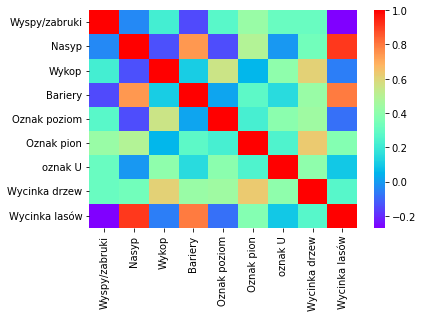

In [60]:
sns.heatmap(road_details_per_km.corr(),cmap='rainbow')

<AxesSubplot:>

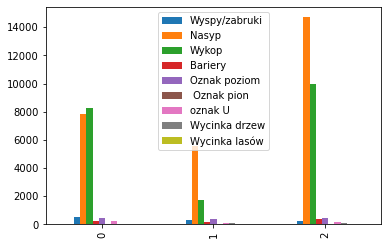